In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
insurance = pd.read_excel('Dataset_pandas_assign.xlsx')
insurance = insurance.iloc[1:]

In [4]:
insurance.tail(4)

,Unique number,"Возраст, полных лет",Гражданство,Стаж вождения,Пол,КБМ,Город,Марка,Модель,Тип ТС,Год выпуска,Расположение руля,Объём двигателя,Цвет,Период страхования,Страховая премия,Льготы,Дата проишествия,Регион ДТП,Сумма убытка
10906,c84892e816bec0dbd5429c75fb57b305,55,Казахстан,20,М,9,Петропавловск,Нива 212300-55I,Шевроле,Легковые автомобили,2012-01-01 00:00:00,Слева,1690,серебристый,16.06.2013-15.06.2014,6400,NaN,NaN,NaN,NaN
10907,d406878650cbf18002d29968bf832c31,73,Казахстан,45,М,8,Костанай,Нива 212300-55I,Шевроле,Легковые автомобили,2010-12-01 00:00:00,Слева,1700,снежная королева,18.06.2013-17.06.2014,10053,NaN,NaN,NaN,NaN
10908,dcb07973b07a508c4680406b38fdfa56,67,Казахстан,20,М,8,Усть-Каменогорск,Нива 212300-55glc,Шевроле,Легковые автомобили,2011-12-01 00:00:00,Слева,1690,снежная королева,01.07.2013-30.06.2014,5052,Инвалид,NaN,NaN,NaN
10909,e5d53857c001d29441e397a35ccc0392,65,Казахстан,34,М,8,Актобе,Нива 212300-55I,Шевроле,Легковые автомобили,2011-12-01 00:00:00,Слева,1690,серебристый,01.07.2013-30.06.2014,3480,Инвалид,NaN,NaN,NaN


# Каков средний возраст и процент дорожно-транспортных происшествий для всех водителей в разбивке по полу?

In [69]:
Q1= insurance.groupby('Пол', as_index = False)['Возраст, полных лет'].mean(0).round(0)
road_accidents = insurance['Дата проишествия'].count()

In [70]:
print(Q1)

  Пол  Возраст, полных лет
0   Ж                 44.0
1   М                 48.0


In [71]:
Q1.rename(columns = {'Возраст, полных лет':'Средний возраст, лет'},inplace =True)

In [72]:
road_accidents = insurance['Дата проишествия'].count()
road_accidents_by_genders = insurance.groupby('Пол', as_index = False)['Дата проишествия'].count()
Q1['Процент дорожно-транспортных происшествий, %'] = ((road_accidents_by_genders['Дата проишествия']/road_accidents)*100).round(0)

In [73]:
Q1

,Пол,"Средний возраст, лет","Процент дорожно-транспортных происшествий, %"
0,Ж,44.0,18.0
1,М,48.0,82.0


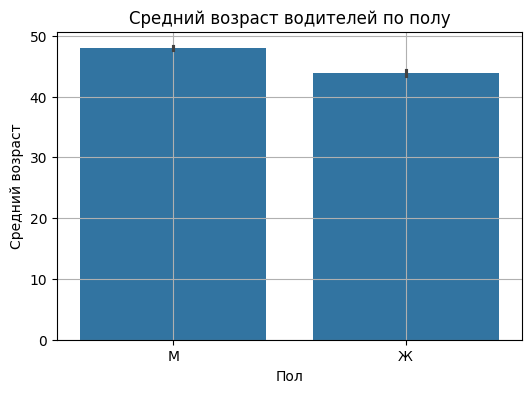

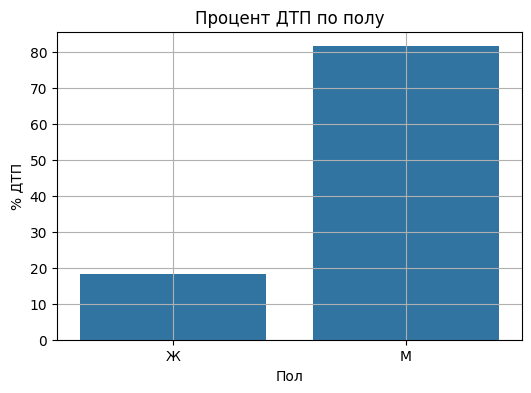

In [74]:
plt.figure(figsize=(6, 4))
sns.barplot(data=insurance, x='Пол', y='Возраст, полных лет', estimator='mean')
plt.title('Средний возраст водителей по полу')
plt.ylabel('Средний возраст')
plt.grid(True)
plt.show()
road_accidents_by_gender = insurance.groupby('Пол')['Дата проишествия'].count()
total_accidents = insurance['Дата проишествия'].count()
percent_by_gender = (road_accidents_by_gender / total_accidents * 100).round(1)
plt.figure(figsize=(6, 4))
sns.barplot(x=percent_by_gender.index, y=percent_by_gender.values)
plt.title('Процент ДТП по полу')
plt.ylabel('% ДТП')
plt.grid(True)
plt.show()


# В чем разница между средним опытом вождения и средним классом бонус-малус для мужчин и женщин?

In [13]:
avg_driver_exp = insurance.groupby(by = 'Пол')['Стаж вождения'].mean()
avg_bm = insurance.groupby(by = 'Пол')['КБМ'].mean()
Q2 = np.subtract(avg_driver_exp,avg_bm)
Q2

Пол
Ж     7.099703
М    11.302363
dtype: float64

# В каком году было выпущено наибольшее количество автомобилей? Пожалуйста, предоставьте список 10 лучших автомобилей за последние годы, отсортированный по количеству автомобилей (по убыванию).

In [20]:
insurance['Год выпуска'] = pd.to_datetime(insurance['Год выпуска'], errors='coerce')
Q3 = insurance.groupby(insurance['Год выпуска'].dt.year)['Год выпуска'].count().sort_values(ascending=False)[:10]

In [21]:
Q3

Год выпуска
2007    715
1995    653
1993    594
1996    594
1992    561
1994    520
2002    498
1997    497
1991    489
2006    467
Name: Год выпуска, dtype: int64

# Какая компания-производитель автомобилей является самой популярной в любых из 5 городов? (выберите города, которые вам больше всего нравятся)

In [34]:
Q3 = insurance[insurance['Город'].isin(['Алматы','Нур-Султан','Есик','Шелек','Актобе'])]
Q3

,Unique number,"Возраст, полных лет",Гражданство,Стаж вождения,Пол,КБМ,Город,Марка,Модель,Тип ТС,Год выпуска,Расположение руля,Объём двигателя,Цвет,Период страхования,Страховая премия,Льготы,Дата проишествия,Регион ДТП,Сумма убытка
1,74d88aec9cfe39a1bc5a93314c4326dc,30,Казахстан,10,М,8,Алматы,156,Alfa romeo,Легковые автомобили,2000-12-01 00:00:00,Слева,3000,красный,14.06.2013-13.06.2014,17625,NaN,NaN,NaN,NaN
2,c13fe1fef2192e82056e26544c3efed3,36,Казахстан,17,М,8,Нур-Султан,156,Alfa romeo,Легковые автомобили,2001-12-01 00:00:00,Слева,2387,синий,19.07.2013-18.07.2014,8484,NaN,NaN,NaN,NaN
3,8dd751c0f9c0cf216303a0d445099e1b,46,Казахстан,28,М,8,Алматы,Rsv 1000r,Aprilia,Мотоциклы и мотороллеры,2005-12-01 00:00:00,Слева,998,красный,07.06.2013-06.06.2014,8031,NaN,NaN,NaN,NaN
4,005f21aeed2db9c1694f724f365be6b5,45,Казахстан,13,М,7,Нур-Султан,80,Audi,Легковые автомобили,1992-12-01 00:00:00,Слева,1984,серебристый металлик архивный,30.05.2013-29.11.2013,6709,NaN,NaN,NaN,NaN
8,0198b1f0b325da85356eb37824643400,61,Казахстан,15,Ж,8,Алматы,A4,Audi,Легковые автомобили,2002-12-01 00:00:00,Слева,2976,серебристый металлик архивный,16.06.2013-15.06.2014,19975,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10866,c4209dbbea71748ea2df9267443dc538,40,Казахстан,21,М,9,Алматы,2206,УАЗ,Легковые автомобили,2001-12-01 00:00:00,Слева,2445,зелёный,19.06.2013-18.06.2014,15667,NaN,NaN,NaN,NaN
10870,ceb216027ebb266bb10a2dbe6282831f,29,Казахстан,10,М,6,Алматы,39094,УАЗ,Легковые автомобили,2004-12-01 00:00:00,Слева,2890,серый,15.06.2013-14.06.2014,19975,NaN,NaN,NaN,NaN
10873,d899175a23b136dd48f8de5f0d880aa4,64,Казахстан,19,М,9,Алматы,3962,УАЗ,Легковые автомобили,1998-12-01 00:00:00,Слева,2445,серо-голубой,06.06.2013-05.06.2014,15667,Инвалид,NaN,NaN,NaN
10901,6645aa07368d272eed8dbbc6c4412a5c,61,Казахстан,31,М,8,Актобе,Нива 212300-55I,Шевроле,Легковые автомобили,2013-12-01 00:00:00,Слева,1690,снежная королева,20.06.2013-25.02.2014,5743,NaN,NaN,NaN,NaN


In [35]:
Q3.groupby(by='Город')['Модель'].agg(pd.Series.mode)

Город
Актобе                                                   Toyota
Алматы                                                   Toyota
Есик                          [Fiat, Mercedes-Benz, Mitsubishi]
Нур-Султан                                               Toyota
Шелек         [Audi, Ford, Mercedes-Benz, Mitsubishi, Toyota...
Name: Модель, dtype: object

# Какие цвета автомобилей люди предпочитают больше всего - темные или светлые? Разделите все цвета на темные и светлые по своему усмотрению.

In [41]:
dark = ['черный', 'синий', 'серый', 'серый металлик', 'черный металлик', 'темно-синий металлик', 'темно-синий']
light =['серебристый металлик архивный', 'белый', 'серебристый', 'красный', 'зелёный', 'синий металлик', 'зеленый металлик', 'золотистый металлик', 'комбинированный', 'белый металлик', 'вишневый', 'бежевый ', 'голубой'] 

In [42]:
insurance.loc[insurance['Цвет'].isin(dark),'Тон']= 'Темный'
insurance.loc[insurance['Цвет'].isin(light),'Тон']= 'Светлый'

In [43]:
Q4 = insurance.groupby(by='Тон')['Тон'].count()

In [44]:
Q4

Тон
Светлый    5759
Темный     2901
Name: Тон, dtype: int64

# Какая компания по производству автомобилей является самой популярной среди женщин в Алматы, Шымкенте и Нурсултане (Астане) соответственно?

In [46]:
Q5 = insurance[(insurance['Город'].isin(['Шымкент','Алматы','Нур-Султан'])) & (insurance['Пол'] == 'Ж')]
Q5 = Q5.groupby(['Город'])['Модель'].agg(pd.Series.mode)
Q5

Город
Алматы                Toyota
Нур-Султан            Toyota
Шымкент       [Audi, Toyota]
Name: Модель, dtype: object

# Каково распределение дорожно-транспортных происшествий по разным городам? Какой город занимает первое место по количеству дорожно-транспортных происшествий? Есть ли в топ-10 городов страны какие-либо из них?

In [21]:
cities = ['Абай',  'Акколь',  'Аксай',  'Аксу',  'Актау',  'Актобе',  'Алга',  'Алматы',  'Арал',  'Аркалык',  'Арыс',  'Нур-Султан',  'Атбасар',  'Атырау',  'Аягоз',  'Байконыр',  'Балхаш',  'Булаево',  'Державинск',  'Ерейментау',  'Есик',  'Есиль',  'Жанаозен',  'Жанатас',  'Жаркент',  'Жезказган',  'Жем',  'Жетысай',  'Житикара',  'Зайсан',  'Алтай',  'Казалинск',  'Кандыагаш',  'Капшагай',  'Караганда',  'Каражал',  'Каратау',  'Каркаралинск',  'Каскелен',  'Кентау',  'Кокшетау',  'Костанай',  'Косшы',  'Кулсары',  'Курчатов',  'Кызылорда',  'Ленгер',  'Лисаковск',  'Макинск',  'Мамлютка',  'Павлодар',  'Петропавловск',  'Приозёрск',  'Риддер',  'Рудный',  'Сарань',  'Сарканд',  'Сарыагаш',  'Сатпаев',  'Семей',  'Сергеевка',  'Серебрянск',  'Степногорск',  'Степняк',  'Тайынша',  'Талгар',  'Талдыкорган',  'Тараз',  'Текели',  'Темир',  'Темиртау',  'Тобыл',  'Туркестан',  'Уральск',  'Усть-Каменогорск',  'Ушарал',  'Уштобе',  'Форт-Шевченко',  'Хромтау',  'Шардара',  'Шалкар',  'Шар',  'Шахтинск',  'Шемонаиха',  'Шу',  'Шымкент', 'Щучинск',  'Экибастуз',  'Эмба']

In [48]:
Q6 = insurance.groupby('Город',as_index=False)['Дата проишествия'].count().sort_values('Дата проишествия', ascending=False).head(10)
Q6.rename(columns = {'Дата проишествия':'Кол-во дорожных происшествий'}, inplace = True)

In [49]:
Q6.loc[Q8['Город'].isin(cities),'Местность'] ='Город'
Q6.loc[~Q8['Город'].isin(cities),'Местность'] ='Сельская местность'
Q6

,Город,Кол-во дорожных происшествий,Местность
25,Алматы,56,Город
337,Петропавловск,17,Город
309,Нур-Султан,15,Город
12,Актобе,15,Город
234,Костанай,10,Город
224,Кокшетау,5,Город
192,Караганда,3,Город
40,Атбасар,2,Город
41,"Атбасар,Атбасар",2,Сельская местность
451,Шымкент,2,Город


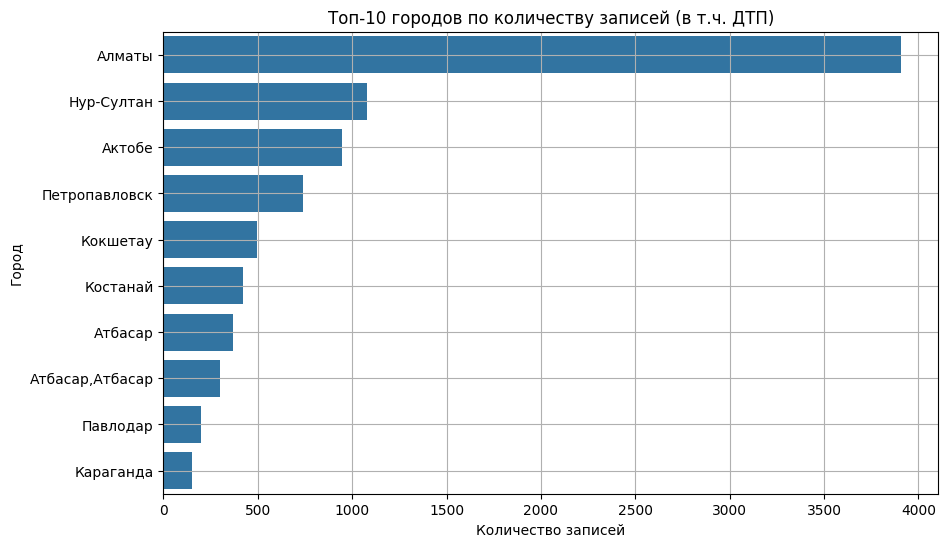

In [63]:
plt.figure(figsize=(10, 6))
top_cities = insurance['Город'].value_counts().head(10)
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title('Топ-10 городов по количеству записей (в т.ч. ДТП)')
plt.xlabel('Количество записей')
plt.ylabel('Город')
plt.grid(True)
plt.show()


# У скольких людей было более 1 автомобиля за один год? Есть ли водитель, который попадал в более чем 1 автомобильную аварию за один год?

In [50]:
Q7 = insurance.groupby('Unique number',as_index=False)['Марка'].count()

In [52]:
Q7= Q7[Q7['Марка']>1]

In [53]:
Q7

,Unique number,Марка
23,00ce5edb26bc950bb6b8bc2542f228f3,2
32,010a949dc5eccda1e309fe0954ed94f1,2
64,01d831ff617e0f0e77bd237bf1b9bed1,2
67,01e8782cf57e847baa387fe76d893eb7,2
87,02dcee04506770b1909c0fa1ebe404e5,2
...,...,...
9378,fed1ab1df8de1cc68bf2ccaf918ac4e4,2
9381,fedaa7440589bfc670b4f36dcaaa6586,2
9406,ff8ad431598eea94fddeb8eab25283d3,3
9409,ffb765b2720e669c12b0e1e95bca8d4a,4


In [55]:
Q7_2 = insurance.groupby('Unique number',as_index = False)['Дата проишествия'].count()

In [56]:
Q7_2

,Unique number,Дата проишествия
0,0002a2f516ef21ac1e56e6b9825c9d8b,0
1,0010956940024093ae8a8fd43454336a,0
2,0010a0dc83b236c45a0baa9d003ffbdb,0
3,0018e2b2df7379bf7ae504f0b63a2663,0
4,0020f48a296549a8ef2e51aaa90b5053,0
...,...,...
9415,ffd7a7f07ded3161765de59d2b170819,0
9416,ffd7e976b4e9e078774cba360b89bc58,0
9417,ffe073db68f2884d89cf0efab4b38657,0
9418,ffef1aa79482bffbdf5b1244e5cfc14e,0


In [27]:
Q7_2=Q9_2[Q9_2['Дата проишествия']>1]

In [28]:
Q7_2.shape

(5, 2)

In [29]:
Q7_2

,Unique number,Дата проишествия
371,0a3a1e71a726f4744afbdb2ef1357148,7
789,14f69489b14639e440988e3a52a650e5,2
1002,1bbce6dfdba970d99f41ed1f44488fc8,3
3201,56a4c2beb2e15a034bb3c2fc0c544b7e,2
7808,d2f959644b31e72df511f402d1136141,2


# Каково распределение дорожно-транспортных происшествий в зависимости от класса "бонус-малус"?

In [70]:
Q8 = insurance.groupby(['КБМ'])['Дата проишествия'].count()
Q8

КБМ
1     0
2     2
3    18
4     8
5    16
6    12
7    12
8    39
9    29
Name: Дата проишествия, dtype: int64

# Какая компания-производитель автомобилей является самой популярной в любых из 5 городов? (выберите города, которые вам больше всего нравятся)

In [58]:
Q9 = insurance[insurance['Город'].isin(['Петропавловск', 'Костанай', 'Нур-Султан', 'Актау', 'Караганда'])]
Q9 = Q9.groupby(['Город'])['Модель'].agg(pd.Series.mode)
Q9

Город
Актау                                 Toyota
Караганда        [Mercedes-Benz, Volkswagen]
Костанай                                 ВАЗ
Нур-Султан                            Toyota
Петропавловск                     Volkswagen
Name: Модель, dtype: object

# Машины какого года больше всего попадают в аварии?

In [84]:
import seaborn as sns
his= insurance.groupby(insurance['Год выпуска'].dt.year)['Дата проишествия'].count().reset_index(name='Количество аварий')
his = his[his['Количество аварий']>1]
his.head()
his

,Год выпуска,Количество аварий
25,1989,2
27,1991,8
28,1992,2
29,1993,7
30,1994,7
31,1995,11
32,1996,12
33,1997,8
34,1998,5
35,1999,10


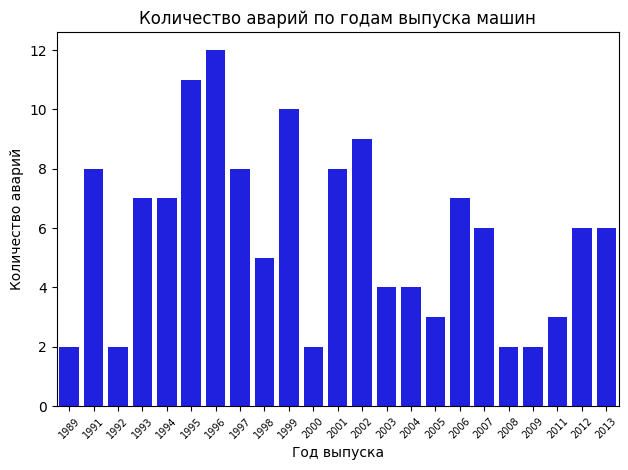

In [94]:
import matplotlib.pyplot as plt
sns.barplot(data=his, x='Год выпуска', y='Количество аварий', color='blue')
plt.title('Количество аварий по годам выпуска машин')
plt.xlabel('Год выпуска')
plt.ylabel('Количество аварий')
plt.xticks(rotation=45, fontsize=7)          
plt.tight_layout()
plt.show()
